<a href="https://colab.research.google.com/github/vanditaagarwal/Neural_Network_for_Classification/blob/main/M20MA208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

As the data is already splitted into training and test data using standard protocol, so I have just used the splitted files as X_train, X_test, y_train, y_test, given below.

In [ ]:
# Loading MNIST training data
X_train = pd.read_csv('/content/mnist_train.csv',header=None)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Loading MNIST test data
X_test = pd.read_csv('/content/mnist_test.csv',header=None)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
           dtype='int64', length=785)

In [ ]:
# Renaming the column of given classes as 'Val'
X_train.rename(columns={0:'Val'},inplace=True)
X_train.head()

,Val,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Renaming the column of given classes as 'Val'
X_test.rename(columns={0:'Val'},inplace=True)
X_test.head()

,Val,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Initializing y_train and y_test

y_train=X_train['Val']
y_test=X_test['Val']
y_train.head()
#dataframe['Columnn name'].value_counts().count()
y_train.value_counts().count()
#y_train.describe

10

In [ ]:
# Initializing X_train and X_test

X_train=X_train.drop(['Val'], axis = 1)
X_test=X_test.drop(['Val'], axis = 1)
X_train.head()
X_test.head()


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Printing shapes of X_train, X_test, y_train, y_test

print("X_train shape =", X_train.shape)
print("X_test shape =", X_test.shape)
print("y_train shape =", y_train.shape)
print("y_test shape =", y_test.shape)

X_train shape = (60000, 784)
X_test shape = (10000, 784)
y_train shape = (60000,)
y_test shape = (10000,)


In [ ]:
# Converting the true labels into standard binary labels

def onehot_encoding(y, nclasses):
    yone_hot = np.zeros((y.shape[0], nclasses))
    idx = [np.arange(y.shape[0]), y]
    yone_hot[idx] = 1
    return yone_hot

In [ ]:
# Checking the converted labels

print(onehot_encoding(y_train,10))

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [ ]:
# Defining activation functions and their derivatives to be used in this project

def linear(x):
    return x

def der_linear(x):
    return np.ones_like(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def der_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

def der_softmax(x):
   return softmax(x) * (1 - softmax(x))

In [ ]:
# Defining cross entropy loss function and their derivatives

def cross_entropy_loss(y_pred,y_true):
  return -np.sum(y_true * np.log(y_pred))

#def cross_entropy_loss(yHat, y):
#    if y == 1:
#      return -np.log(yHat)
#    else:
#      return -np.log(1 - yHat)


def crossentropyloss1(y_pred,y_true):
    global K
    K = 10   #since the number of classes in this dataset is 10.
    N = len(y_true)
    # loss_sample stores the cross entropy for each sample in X
    # convert y_true from labels to one-hot-vector encoding
    y_true_one_hot = (y_true[:,np.newaxis] == np.arange(K))
    loss_sample = (np.log(y_pred) * y_true_one_hot).sum(axis=1)
    return -np.mean(loss_sample)

def delta_cross_entropy(X,y):
    m = y.shape[0]
    grad = softmax(X)
    grad[range(m),y] -= 1
    grad = grad/m
    return grad

def cross_entropy_loss_gradient(p, y):
    assert(p.shape == y.shape and p.shape[1] == 1)
    py = p[y == 1]
    assert(py.size == 1)
    D = np.zeros_like(p)
    D[y == 1] = -1/py.flat[0]
    return D.flatten()

In [ ]:
# Implementing Neural Network for classification by initializing weights and biases randomly, and using forward and backward propagation

class NeuralNetworkforclassification:

    # Initializing weights and biases randomly
    def __init__(self, input_size, hidden_sizes, output_size, nepochs, learningrate):
        layer_sizes = [input_size] + hidden_sizes + [output_size]

        self.weights = []
        self.biases = []
        for i in range(len(layer_sizes) - 1):
            n_in = layer_sizes[i]
            n_out = layer_sizes[i + 1]
            self.weights.append(np.random.randn(n_in, n_out))
            self.biases.append(np.random.randn(1, n_out))

        self.t = [None for _ in range(len(self.weights) + 1)]

        # Applying sigmoid function in the hidden layers and softmax function in the output layer
        self.activations = [linear] + [sigmoid for _ in range(len(self.weights) - 1)] + [softmax]
        self.der_activations = [der_linear] + [der_sigmoid for _ in range(len(self.weights) - 1)] + [der_sigmoid]

    # Implementing forward propagation
    def forwardprop(self, x, grad=False):
        if grad and self.t[0] is not None:
            raise ValueError("Cannot call forward with grad without calling backwards")

        if grad:
            self.t[0] = x

        for i in range(len(self.weights)):
            x_hat = x @ self.weights[i] + self.biases[i]
            x = self.activations[i + 1](x_hat)
            if grad:
                self.t[i + 1] = x_hat

        return x

    # Implementing backward propagation
    def backwardprop(self, der_loss):
        assert der_loss.shape == self.weights[-1].shape[-1:]

        weights_grad = [None for w in self.weights]
        biases_grad = [None for b in self.biases]

        der_activation = self.der_activations[-1]
        error = der_loss * der_activation(self.t[-1]) # (n_out) * (n_out)
        error = error.reshape(1, -1)

        for i in reversed(range(len(self.weights))):
            x = self.t[i]
            activation = self.activations[i]
            der_activation = self.der_activations[i]

            weights_grad[i] = error * activation(x.reshape(-1, 1))
            biases_grad[i] = error * 1 # derivative of bias is vector of ones, which we represent as 1 to be explicit

            error = error @ self.weights[i].T
            error = error * der_activation(x).reshape(1, -1)

        self.t = [None for _ in range(len(self.weights) + 1)]

        return weights_grad, biases_grad

    def predict(self, x):
        y = self.forwardprop(x)
        preds = np.argmax(y, axis=1)
        return preds

In [ ]:
# Computing numerical gradient of weights and biases by defining delta=1e-8

def comp_num_grad(model, X, Y, batch_size, nclasses, delta=1e-8):
    batches = list(zip(X, Y))
    #print(batches)
    #print(len(batches))

    def calculate_loss():
        loss = 0
        for i in range(0, len(batches), batch_size):
            batch = batches[i : i + batch_size]
            x, y = zip(*batch)
            x = np.array(x)
            y = np.array(y)
            y_one_hot = onehot_encoding(y, nclasses)
            y_hat = model.forwardprop(x)
            loss += crossentropyloss1(y_hat, y_one_hot) * len(x)
        return loss / len(X)

    loss1 = calculate_loss()

    num_weights_grad = [np.zeros(w.shape) for w in model.weights]
    num_biases_grad = [np.zeros(b.shape) for b in model.biases]
    for l in range(len(model.weights)):
        for ix, iy in np.ndindex(model.weights[l].shape):
            old_w = model.weights[l][ix][iy]
            new_w = old_w + delta
            model.weights[l][ix][iy] = new_w

            loss2 = calculate_loss()
            dL = loss1 - loss2
            dw = old_w - new_w
            num_weights_grad[l][ix][iy] = dL / dw

            model.weights[l][ix][iy] = old_w

        for ii in range(len(model.biases[l][0])):
            old_b = model.biases[l][0][ii]
            new_b = old_b + delta
            model.biases[l][0][ii] = new_b

            loss2 = calculate_loss()
            dL = loss1 - loss2
            db = old_b - new_b
            num_biases_grad[l][0][ii] = dL / db

            model.biases[l][0][ii] = old_b

    return num_weights_grad, num_biases_grad

In [ ]:
# Checking batches
batches = list(zip(X_train, y_train))
print(batches)
print(len(batches))

[(1, 5), (2, 0), (3, 4), (4, 1), (5, 9), (6, 2), (7, 1), (8, 3), (9, 1), (10, 4), (11, 3), (12, 5), (13, 3), (14, 6), (15, 1), (16, 7), (17, 2), (18, 8), (19, 6), (20, 9), (21, 4), (22, 0), (23, 9), (24, 1), (25, 1), (26, 2), (27, 4), (28, 3), (29, 2), (30, 7), (31, 3), (32, 8), (33, 6), (34, 9), (35, 0), (36, 5), (37, 6), (38, 0), (39, 7), (40, 6), (41, 1), (42, 8), (43, 7), (44, 9), (45, 3), (46, 9), (47, 8), (48, 5), (49, 9), (50, 3), (51, 3), (52, 0), (53, 7), (54, 4), (55, 9), (56, 8), (57, 0), (58, 9), (59, 4), (60, 1), (61, 4), (62, 4), (63, 6), (64, 0), (65, 4), (66, 5), (67, 6), (68, 1), (69, 0), (70, 0), (71, 1), (72, 7), (73, 1), (74, 6), (75, 3), (76, 0), (77, 2), (78, 1), (79, 1), (80, 7), (81, 9), (82, 0), (83, 2), (84, 6), (85, 7), (86, 8), (87, 3), (88, 9), (89, 0), (90, 4), (91, 6), (92, 7), (93, 4), (94, 6), (95, 8), (96, 0), (97, 7), (98, 8), (99, 3), (100, 1), (101, 5), (102, 7), (103, 1), (104, 7), (105, 1), (106, 1), (107, 6), (108, 3), (109, 0), (110, 2), (111, 9

In [ ]:
# Computing analytical gradient of weights and biases by defining delta=1e-8

def comp_analy_grad(model, X, Y, batch_size, nclasses):
    analy_weights_grad = [np.zeros(w.shape) for w in model.weights]
    analy_biases_grad = [np.zeros(b.shape) for b in model.biases]

    batches = list(zip(X, Y))
    #print(batches)
    #print(len(batches))
    for i in range(0, len(batches), batch_size):
        batch = batches[i : i + batch_size]
        x, y = zip(*batch)
        x = np.array(x)
        y = np.array(y)
        y_one_hot = onehot_encoding(y, nclasses)
        y_hat = model.forwardprop(x, grad=True)

        weights_grad, biases_grad = model.backwardprop(delta_cross_entropy(y_hat, y_one_hot))
        for l in range(len(model.weights)):
            analy_weights_grad[l] += weights_grad[l]
            analy_biases_grad[l] += biases_grad[l]

    for l in range(len(model.weights)):
        analy_weights_grad[l] /= len(X)
        analy_biases_grad[l] /= len(X)

    return analy_weights_grad, analy_biases_grad

train set


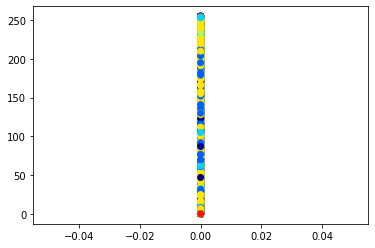

In [ ]:
# Checking training set for 100 features
print("train set")
_ = plt.scatter(X_train.iloc[:, 1], X_train.iloc[:, 100], c=y_train, cmap="jet")

test set


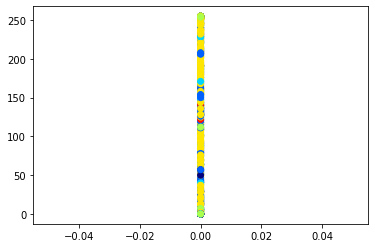

In [ ]:
# Checking test set for 100 features
print("test set")
_ = plt.scatter(X_test.iloc[:, 1], X_test.iloc[:, 100], c=y_test, cmap="jet")

In [ ]:
# Implementing Stochastic Gradient descent method for optimization

def stoch_gradient_descent(model, X, Y, lr, nclasses):
    current_loss = 0
    for x, y in zip(X, Y):

        x = x.reshape(1, -1)
        y = y.reshape(1)
        y_one_hot = onehot_encoding(y, nclasses)


        y_hat = model.forwardprop(x, grad=True)


        loss = crossentropyloss1(y_hat, y_one_hot)
        d_error = delta_cross_entropy(y_hat, y_one_hot)
        current_loss += loss


        model.backwardprop(d_error)


        for i in range(len(model.weights)):
            model.weights[i] += lr * -model.weights_grad[i]
            model.biases[i] += lr * -model.biases_grad[i]

            model.weights_grad[i].fill(0)
            model.biases_grad[i].fill(0)

    return current_loss / len(X)



In [ ]:
# Implementing Numerical Gradient Descent method for optimization

def gradient_descent(model, X, Y, lr, batch_size, nclasses):
    num_weights_grad, num_biases_grad = comp_num_grad(model, X, Y, batch_size=784, nclasses=10)
    for l in range(len(model.weights)):
        model.weights[l] += lr * -num_weights_grad[l]
        model.biases[l] += lr * -num_biases_grad[l]

    print(model.weights)
    print(model.biases)

    loss = 0
    batches = list(zip(X, Y))
    for i in range(0, len(batches), batch_size):
        batch = batches[i : i + batch_size]
        x, y = zip(*batch)
        x = np.array(x)
        y = np.array(y)
        y_one_hot = onehot_encoding(y, nclasses)
        y_hat = model.forwardprop(x)
        loss += crossentropyloss1(y_hat, y_one_hot) * len(x)
    loss /= len(X)

    return loss


'\nloss_history = []\nacc_history = []\nfor epoch in range(500):\n    loss = numerical_gradient_descent(model, X_train, y_train, lr=1.0, batch_size=784, num_classes=10)\n    #print(model.predict(X_test.values))\n    acc = np.mean(model.predict(X_test.values) == y_test.values)\n    loss_history.append(loss)\n    acc_history.append(acc)\n    if epoch % 10 == 0:\n        print(f"epoch: {epoch:<6} loss: {loss:.6f}     accuracy: {acc:.4f}")\n'

In [ ]:
# Function to take input size(of respective layer), hidden size(of respective layers), output size(of respective layers) , learning rate,
# number of epochs and pass it to the constructed model of neural network for classification

def modelimp():
  modelimp.input_size = 784
  modelimp.hidden_sizes = [int(input("Enter the number of hidden nodes : "))]
  # counting the number of distinct classes in y and assigning them as the number of nodes in output layer
  modelimp.output_size = y_train.value_counts().count()
  print(modelimp.output_size)
  modelimp.nepochs = int(input("Enter the number of epochs : "))
  modelimp.learningrate = float(input("Enter the learning rate : "))
  modelimp.model = NeuralNetworkforclassification(modelimp.input_size, modelimp.hidden_sizes, modelimp.output_size, modelimp.nepochs, modelimp.learningrate)


**Implementing various configuration parameters given in the task.**

1) N = size of the input; H = 10; η = 0.01; E = 20

In [ ]:
modelimp()

Enter the number of hidden nodes : 10
10
Enter the number of epochs : 20
Enter the learning rate : 0.01


In [ ]:
losshist = []
accuracy = []
nepochs = modelimp.nepochs
for epoch in range(nepochs):
    loss = gradient_descent(modelimp.model, X_train, y_train, lr=modelimp.learningrate, batch_size=784, nclasses=10)
    #print(model.predict(X_test.values))
    acc = np.mean(modelimp.model.predict(X_test.values) == y_test.values)
    losshist.append(loss)
    accuracy.append(acc)
    print(f"epoch: {epoch:<6} loss: {loss:.6f}     accuracy: {acc:.4f}")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


[array([[-0.32658246, -0.47193955, -0.07001251, ..., -0.51961934,
         1.04178281,  0.22316232],
       [-0.69390602, -0.63482223, -0.89337446, ..., -0.33300445,
         0.69239493,  1.70724402],
       [ 0.05109735,  0.45738418,  1.42312291, ...,  0.58711941,
        -0.48644781, -0.13980629],
       ...,
       [-0.01654635,  1.90390776, -1.46934768, ..., -0.50268352,
         0.66292429, -1.53555417],
       [ 1.01869797,  0.51040001, -0.07065801, ...,  1.11286594,
        -1.17354687,  1.36589526],
       [ 0.00403038,  0.18063653, -0.85152502, ..., -0.43370039,
        -0.58949347,  0.7197186 ]]), array([[ 0.49252874, -1.56980715,  0.5977062 , -0.93456509,  0.45079774,
        -0.55863316,  0.19357111,  1.60876462,  2.67309462,  1.02398753],
       [ 0.09354314,  1.31266061,  0.82713095, -0.06381263, -0.07394781,
        -0.44717975, -0.37677737,  0.92571272,  0.1023152 , -0.43628653],
       [-1.13312469, -0.78020671, -0.27512863,  0.04983182, -0.20737483,
         1.5263022

Text(0.5, 1.0, 'Loss vs Epochs')

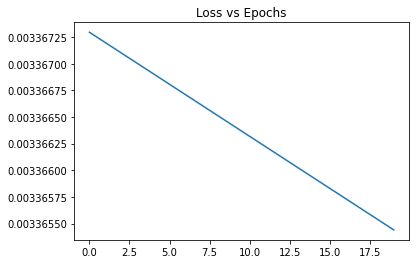

In [ ]:
plt.plot(losshist)
plt.title("Loss vs Epochs")

Text(0.5, 1.0, 'Accuracy vs Epochs')

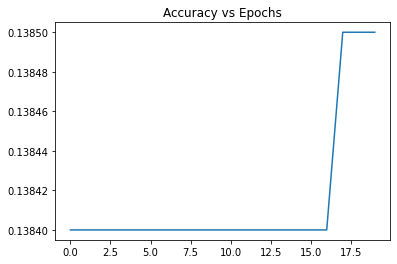

In [ ]:
plt.plot(accuracy)
plt.title("Accuracy vs Epochs")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values, modelimp.model.predict(X_test.values))
print(cm)
print(cm.shape)

[[  2   1   0   0  45   0  41   0 891   0]
 [  0   2   0   0 522  76 244   0 291   0]
 [  1   0   0   0 165  66 204   0 594   2]
 [  2   1   0   0 268  22 348   0 364   5]
 [  1   2   0   0  81   4 237   0 651   6]
 [  2   2   0   0 159   8 211   0 509   1]
 [  4   2   0   0  30   3 231   0 688   0]
 [  0   0   0   0 133   6 199   0 690   0]
 [  1   0   0   0 164  10 377   0 422   0]
 [  1   0   0   0 144   9 413   0 437   5]]
(10, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


2) N = size of the input; H = 10; η= 0.1; E = 50

In [ ]:
modelimp()

Enter the number of hidden nodes : 10
10
Enter the number of epochs : 50
Enter the learning rate : 0.1


In [ ]:
losshist = []
accuracy = []
nepochs = modelimp.nepochs
for epoch in range(nepochs):
    loss = gradient_descent(modelimp.model, X_train, y_train, lr=modelimp.learningrate, batch_size=784, nclasses=10)
    #print(model.predict(X_test.values))
    acc = np.mean(modelimp.model.predict(X_test.values) == y_test.values)
    losshist.append(loss)
    accuracy.append(acc)
    print(f"epoch: {epoch:<6} loss: {loss:.6f}     accuracy: {acc:.4f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


[array([[-0.78843408,  0.22206401,  0.88158263, ...,  0.41459364,
         0.63169692, -1.2372088 ],
       [-0.17690613,  1.47044111, -0.26412241, ..., -1.44906236,
        -0.4306913 ,  1.05050375],
       [-1.13345015, -0.85615224, -1.11502918, ..., -0.08160133,
        -0.69514045, -0.9655768 ],
       ...,
       [ 2.54941026, -0.24219003, -0.02729788, ..., -0.26514044,
        -1.29398769, -0.36246845],
       [-0.21941308, -0.61827717, -0.29991628, ..., -0.59828448,
         0.74421503,  1.02955358],
       [ 1.07823442, -0.23568716,  0.62565014, ..., -0.54629585,
        -0.36805849,  0.24250808]]), array([[-0.96887793,  0.06375514, -1.86346072,  1.09427618,  0.79739286,
        -0.50995819,  0.06514891,  0.3408855 , -0.63401084, -0.47712294],
       [ 0.42698665,  1.85075893, -0.2414472 ,  1.00573634, -1.17083179,
        -0.4343017 ,  0.25046649,  0.19220144, -1.04474688, -0.26028923],
       [-0.47314237,  0.04312886, -0.97531971,  1.52672772, -0.77447701,
        -1.2820330

Text(0.5, 1.0, 'Loss vs Epochs')

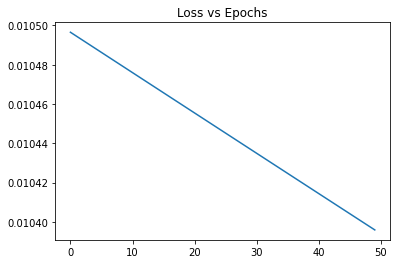

In [ ]:
plt.plot(losshist)
plt.title("Loss vs Epochs")

Text(0.5, 1.0, 'Accuracy vs Epochs')

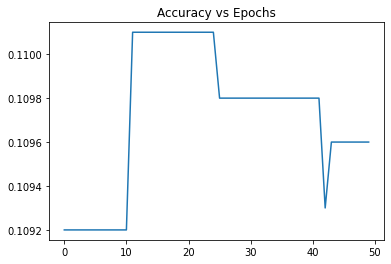

In [ ]:
plt.plot(accuracy)
plt.title("Accuracy vs Epochs")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values, modelimp.model.predict(X_test.values))
print(cm)
print(cm.shape)

[[  2   1   0   0  45   0  41   0 891   0]
 [  0   2   0   0 522  76 244   0 291   0]
 [  1   0   0   0 165  66 204   0 594   2]
 [  2   1   0   0 268  22 348   0 364   5]
 [  1   2   0   0  81   4 237   0 651   6]
 [  2   2   0   0 159   8 211   0 509   1]
 [  4   2   0   0  30   3 231   0 688   0]
 [  0   0   0   0 133   6 199   0 690   0]
 [  1   0   0   0 164  10 377   0 422   0]
 [  1   0   0   0 144   9 413   0 437   5]]
(10, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


3) N = size of the input; H = 20; η = 0.02; E = 50

In [ ]:
modelimp()

Enter the number of hidden nodes : 20
10
Enter the number of epochs : 50
Enter the learning rate : 0.02


In [ ]:
losshist = []
accuracy = []
nepochs = modelimp.nepochs
for epoch in range(nepochs):
    loss = gradient_descent(modelimp.model, X_train, y_train, lr=modelimp.learningrate, batch_size=784, nclasses=10)
    #print(model.predict(X_test.values))
    acc = np.mean(modelimp.model.predict(X_test.values) == y_test.values)
    losshist.append(loss)
    accuracy.append(acc)
    print(f"epoch: {epoch:<6} loss: {loss:.6f}     accuracy: {acc:.4f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


[array([[ 1.52638401,  0.53202938, -2.41908557, ...,  0.35513522,
         0.94788992, -1.14224891],
       [-0.52236159,  0.07730032, -0.13366421, ..., -1.34925538,
        -0.47238841,  0.5062408 ],
       [ 1.37084618,  0.31793137, -0.57946378, ..., -0.27992455,
        -0.26662978,  0.88487921],
       ...,
       [-1.47770971,  0.26137271, -0.35571219, ...,  0.93793045,
         1.16915707, -0.80344863],
       [-0.97344899,  0.33567495, -0.94426527, ..., -0.79547364,
         1.10270043,  0.27754088],
       [-1.17240592,  1.66510949,  1.34350881, ...,  0.21661427,
         1.05412966,  0.51345048]]), array([[ 0.37792122,  1.64510446,  0.31717469,  1.48773815, -0.3052197 ,
        -0.68480298,  0.81801575,  0.3071069 , -0.67350592,  0.87587938],
       [-0.35716476,  0.90655957, -0.14660423, -1.42079826,  0.89592858,
        -1.82035918, -0.82441882, -2.02781547,  1.45934081,  0.25945958],
       [-0.16415146, -0.5352662 , -2.52226534, -1.42621887,  1.11564121,
        -1.1273680

Text(0.5, 1.0, 'Loss vs Epochs')

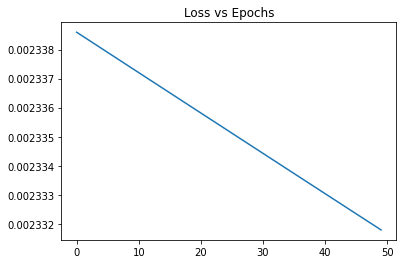

In [ ]:
plt.plot(losshist)
plt.title("Loss vs Epochs")

Text(0.5, 1.0, 'Accuracy vs Epochs')

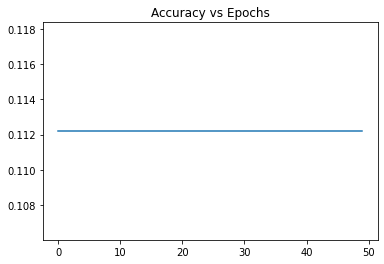

In [ ]:
plt.plot(accuracy)
plt.title("Accuracy vs Epochs")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values, modelimp.model.predict(X_test.values))
print(cm)
print(cm.shape)

[[  2   1   0   0  45   0  41   0 891   0]
 [  0   2   0   0 522  76 244   0 291   0]
 [  1   0   0   0 165  66 204   0 594   2]
 [  2   1   0   0 268  22 348   0 364   5]
 [  1   2   0   0  81   4 237   0 651   6]
 [  2   2   0   0 159   8 211   0 509   1]
 [  4   2   0   0  30   3 231   0 688   0]
 [  0   0   0   0 133   6 199   0 690   0]
 [  1   0   0   0 164  10 377   0 422   0]
 [  1   0   0   0 144   9 413   0 437   5]]
(10, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


4) N = size of the input; H = 2; η = 0.01; E = 10

In [ ]:
modelimp()

Enter the number of hidden nodes : 2
10
Enter the number of epochs : 10
Enter the learning rate : 0.01


In [ ]:
losshist = []
accuracy = []
nepochs = modelimp.nepochs
for epoch in range(nepochs):
    loss = gradient_descent(modelimp.model, X_train, y_train, lr=modelimp.learningrate, batch_size=784, nclasses=10)
    #print(model.predict(X_test.values))
    acc = np.mean(modelimp.model.predict(X_test.values) == y_test.values)
    losshist.append(loss)
    accuracy.append(acc)
    print(f"epoch: {epoch:<6} loss: {loss:.6f}     accuracy: {acc:.4f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


[array([[ 0.87568847,  0.38828605],
       [ 0.93134507, -1.34405176],
       [ 1.38996106,  0.81956703],
       ...,
       [-0.25582935, -0.8348851 ],
       [ 1.09381288,  0.05684012],
       [ 0.1213016 , -1.45753024]]), array([[-0.70279616, -2.59186968,  0.73731962,  0.44468516, -0.83509757,
        -0.2449732 ,  0.31358046,  1.20567137,  0.60332805,  1.49190094],
       [ 0.76905466, -0.86310976,  2.04115035, -0.0707023 , -0.96746943,
        -1.06551232, -0.07520886, -1.41721824, -2.08572247, -0.15935831]])]
[array([[0.12252981, 0.99125413]]), array([[ 0.76960632,  1.43370588, -1.02776908,  0.07449284, -0.14087588,
         0.45518657,  0.66273931, -0.25915969,  0.05564532, -0.14259738]])]
epoch: 0      loss: 0.003867     accuracy: 0.1265
[array([[ 0.87568847,  0.38828605],
       [ 0.93134507, -1.34405176],
       [ 1.38996106,  0.81956703],
       ...,
       [-0.25582935, -0.8348851 ],
       [ 1.09381288,  0.05684012],
       [ 0.1213016 , -1.45753024]]), array([[-0.70278525

Text(0.5, 1.0, 'Loss vs Epochs')

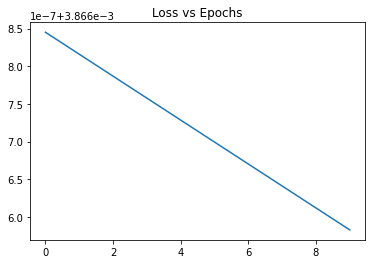

In [ ]:
plt.plot(losshist)
plt.title("Loss vs Epochs")

Text(0.5, 1.0, 'Accuracy vs Epochs')

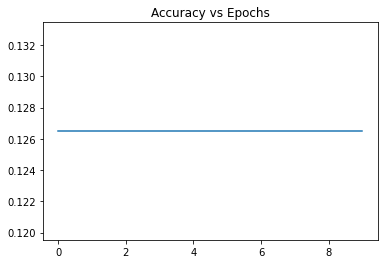

In [ ]:
plt.plot(accuracy)
plt.title("Accuracy vs Epochs")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values, modelimp.model.predict(X_test.values))
print(cm)
print(cm.shape)

[[  2   1   0   0  45   0  41   0 891   0]
 [  0   2   0   0 522  76 244   0 291   0]
 [  1   0   0   0 165  66 204   0 594   2]
 [  2   1   0   0 268  22 348   0 364   5]
 [  1   2   0   0  81   4 237   0 651   6]
 [  2   2   0   0 159   8 211   0 509   1]
 [  4   2   0   0  30   3 231   0 688   0]
 [  0   0   0   0 133   6 199   0 690   0]
 [  1   0   0   0 164  10 377   0 422   0]
 [  1   0   0   0 144   9 413   0 437   5]]
(10, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


5) N = size of the input; H = 4; η= 0.5; E = 25

In [ ]:
modelimp()

Enter the number of hidden nodes : 4
10
Enter the number of epochs : 25
Enter the learning rate : 0.5


In [ ]:
losshist = []
accuracy = []
nepochs = modelimp.nepochs
for epoch in range(nepochs):
    loss = gradient_descent(modelimp.model, X_train, y_train, lr=modelimp.learningrate, batch_size=784, nclasses=10)
    #print(model.predict(X_test.values))
    acc = np.mean(modelimp.model.predict(X_test.values) == y_test.values)
    losshist.append(loss)
    accuracy.append(acc)
    print(f"epoch: {epoch:<6} loss: {loss:.6f}     accuracy: {acc:.4f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


[array([[-1.00766143, -0.45957379,  0.27522526,  2.13397736],
       [-0.82448853,  0.74029607, -0.97273788,  0.90004846],
       [ 0.85659132, -1.09027224,  0.76571282,  0.83978873],
       ...,
       [ 2.49682901,  2.32781308,  0.9457701 , -1.51848438],
       [-1.08096808, -0.09805954, -0.07266183, -0.40330369],
       [-2.27084785,  1.4320492 ,  0.03081678,  2.05857242]]), array([[-1.65849768,  0.68000345, -0.09619153,  1.10113867, -0.26650804,
         0.78638671,  0.16836433,  0.94112199, -0.12273729, -2.58480084],
       [ 0.42106446,  0.17794307,  1.50775655,  0.11177731, -0.71654153,
        -0.26569525, -1.65242455, -0.67866073,  0.13425721, -0.5583162 ],
       [ 0.52660438,  1.97795366, -0.38710412, -2.94563228, -1.40301228,
        -0.59808911,  0.20539784,  1.23320551,  0.41283257,  0.53364626],
       [ 0.62502708,  1.99832505,  0.85973454, -0.31951103,  0.12028555,
         0.43624778, -1.03515609, -1.68713482,  0.65536025, -0.02326658]])]
[array([[-0.79684832, -1.2143

Text(0.5, 1.0, 'Loss vs Epochs')

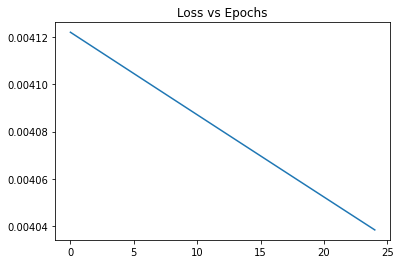

In [ ]:
plt.plot(losshist)
plt.title("Loss vs Epochs")

Text(0.5, 1.0, 'accuracy')

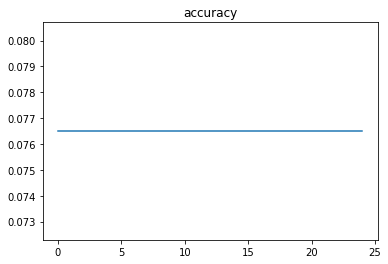

In [ ]:
plt.plot(accuracy)
plt.title("accuracy")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values, modelimp.model.predict(X_test.values))
print(cm)
print(cm.shape)

[[  2   1   0   0  45   0  41   0 891   0]
 [  0   2   0   0 522  76 244   0 291   0]
 [  1   0   0   0 165  66 204   0 594   2]
 [  2   1   0   0 268  22 348   0 364   5]
 [  1   2   0   0  81   4 237   0 651   6]
 [  2   2   0   0 159   8 211   0 509   1]
 [  4   2   0   0  30   3 231   0 688   0]
 [  0   0   0   0 133   6 199   0 690   0]
 [  1   0   0   0 164  10 377   0 422   0]
 [  1   0   0   0 144   9 413   0 437   5]]
(10, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
